In [52]:
import os
import glob
import json

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [21]:
SLICE_DIR = '/om2/scratch/tmp/sabeen/kwyk_data/kwyk_final_uncrop'

with open(os.path.join(SLICE_DIR,'percent_backgrounds.json')) as f:
    percent_backgrounds = json.load(f)

all_percent = dict(filter(lambda x: 'orig' in x[0], percent_backgrounds.items()))
train_percent = dict(filter(lambda x: 'train' in x[0] and 'orig' in x[0], percent_backgrounds.items()))

In [23]:
percent_dict = train_percent

In [53]:
bin_size = 0.01
bins = np.arange(0, 1 + bin_size, bin_size)
hist_counts, bin_edges = np.histogram(list(percent_dict.values()), bins=bins)
total_count = sum(hist_counts)

print("Histogram Counts:")
for count, bin_edge in zip(hist_counts, bin_edges[:-1]):
    print(f"{bin_edge:.3f}-{bin_edge + bin_size:.3f}: {count} ({count / total_count * 100}%)")

Histogram Counts:
0.000-0.010: 0 (0.0%)
0.010-0.020: 0 (0.0%)
0.020-0.030: 0 (0.0%)
0.030-0.040: 0 (0.0%)
0.040-0.050: 0 (0.0%)
0.050-0.060: 0 (0.0%)
0.060-0.070: 0 (0.0%)
0.070-0.080: 0 (0.0%)
0.080-0.090: 0 (0.0%)
0.090-0.100: 0 (0.0%)
0.100-0.110: 0 (0.0%)
0.110-0.120: 0 (0.0%)
0.120-0.130: 0 (0.0%)
0.130-0.140: 0 (0.0%)
0.140-0.150: 0 (0.0%)
0.150-0.160: 0 (0.0%)
0.160-0.170: 0 (0.0%)
0.170-0.180: 0 (0.0%)
0.180-0.190: 0 (0.0%)
0.190-0.200: 0 (0.0%)
0.200-0.210: 0 (0.0%)
0.210-0.220: 0 (0.0%)
0.220-0.230: 0 (0.0%)
0.230-0.240: 0 (0.0%)
0.240-0.250: 0 (0.0%)
0.250-0.260: 0 (0.0%)
0.260-0.270: 0 (0.0%)
0.270-0.280: 0 (0.0%)
0.280-0.290: 0 (0.0%)
0.290-0.300: 0 (0.0%)
0.300-0.310: 0 (0.0%)
0.310-0.320: 0 (0.0%)
0.320-0.330: 0 (0.0%)
0.330-0.340: 0 (0.0%)
0.340-0.350: 0 (0.0%)
0.350-0.360: 0 (0.0%)
0.360-0.370: 0 (0.0%)
0.370-0.380: 0 (0.0%)
0.380-0.390: 0 (0.0%)
0.390-0.400: 0 (0.0%)
0.400-0.410: 0 (0.0%)
0.410-0.420: 0 (0.0%)
0.420-0.430: 0 (0.0%)
0.430-0.440: 0 (0.0%)
0.440-0.450: 0

In [56]:
for i in range(1,len(hist_counts) + 1):
    print(sum(hist_counts[:i]))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
32
67
103
141
195
308
579
1486
5458
17489
45489
94588
166900
261997
385139
552238
768907
1022756
1288877
1546993
1780598
1986608
2165812
2327127
2476831
2618563
2757591
2897918
3041749
3185146
3324242
3456783
3580146
3696050
3812143
7052544


In [60]:
percent_sorted = sorted(list(percent_dict.items()), key=lambda x: x[1])

In [70]:
percent_sorted[3696050]

('/om2/scratch/tmp/sabeen/kwyk_data/kwyk_final_uncrop/train/features/pac_1580_orig_063.npy',
 0.980010986328125)

In [71]:
feature_slice = np.load(percent_sorted[3696050][0])

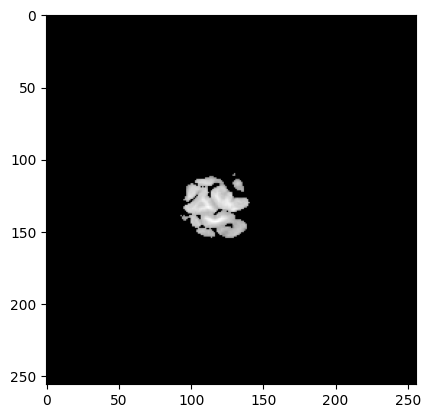

In [72]:
plt.imshow(feature_slice.squeeze(0),cmap='gray')

In [50]:
import nibabel as nib
import matplotlib.pyplot as plt
from nilearn import plotting
from nobrainer.volume import standardize
import numpy as np

In [32]:
def load_brains(image_file: str, mask_file: str, file_path: str = ''):
    # ensure that mask and image numbers match
    image_nr = image_file.split("_")[1]
    mask_nr = mask_file.split("_")[1]
    assert image_nr == mask_nr, "image and mask numbers do not match"

    if file_path != '':
        image_path = os.path.join(file_path, image_file)
        mask_path = os.path.join(file_path, mask_file)
    else:
        image_path = image_file
        mask_path = mask_file

    brain = nib.load(image_path)
    brain_mask = nib.load(mask_path)

    brain = brain.get_fdata()
    brain_mask = brain_mask.get_fdata()
    brain_mask = brain_mask.astype(int)
    # apply skull stripping
    brain[brain_mask == 0] = 0

    return brain, brain_mask, image_nr

In [ ]:
def save_volume(volume, aff, header, path, res=None, dtype=None, n_dims=3):
    """
    Save a volume.
    :param volume: volume to save
    :param aff: affine matrix of the volume to save. If aff is None, the volume is saved with an identity affine matrix.
    aff can also be set to 'FS', in which case the volume is saved with the affine matrix of FreeSurfer outputs.
    :param header: header of the volume to save. If None, the volume is saved with a blank header.
    :param path: path where to save the volume.
    :param res: (optional) update the resolution in the header before saving the volume.
    :param dtype: (optional) numpy dtype for the saved volume.
    :param n_dims: (optional) number of dimensions, to avoid confusion in multi-channel case. Default is None, where
    n_dims is automatically inferred.
    """

    # mkdir(os.path.dirname(path))
    if ".npz" in path:
        np.savez_compressed(path, vol_data=volume)
    else:
        if header is None:
            header = nib.Nifti1Header()
        if isinstance(aff, str):
            if aff == "FS":
                aff = np.array(
                    [[-1, 0, 0, 0], [0, 0, 1, 0], [0, -1, 0, 0], [0, 0, 0, 1]]
                )
        elif aff is None:
            aff = np.eye(4)
        if dtype is not None:
            if "int" in dtype:
                volume = np.round(volume)
            volume = volume.astype(dtype=dtype)
            nifty = nib.Nifti1Image(volume, aff, header)
            nifty.set_data_dtype(dtype)
        else:
            nifty = nib.Nifti1Image(volume, aff, header)
        # if res is not None:
        #     if n_dims is None:
        #         n_dims, _ = get_dims(volume.shape)
        #     res = reformat_to_list(res, length=n_dims, dtype=None)
        #     nifty.header.set_zooms(res)
        nib.save(nifty, path)
    return nifty, path

In [53]:
SOURCE_DIR_00 = "/om2/scratch/tmp/sabeen/kwyk_data/kwyk/rawdata/"
features = sorted(glob.glob(os.path.join(SOURCE_DIR_00, "*orig*")))
labels = sorted(glob.glob(os.path.join(SOURCE_DIR_00, "*aseg*")))

In [ ]:
contains_3 = []
for i in range(len(features)):
    feature_vol, label_vol, _ = load_brains(features[i],labels[i])
    feature_vol[label_vol == 0] = 0  # skull stripping?
    feature_vol = feature_vol / 255.0
    if np.sum(label_vol == 3) > 0:
        contains_3.append((np.sum(label_vol == 3), i))

In [58]:
import json
with open('/om2/user/sabeen/tissue_labeling/misc/check_labels/contains_3.json') as f:
    contains_3 = json.load(f)

In [59]:
sorted_contains_3 = sorted(contains_3, key=lambda x: x[0], reverse=True)

In [60]:
print(len(sorted_contains_3)), print(len(features))
print(sorted_contains_3[-3140]) # only 753 volumes have >10 pixels that =3
print(sorted_contains_3[-3849]) # only 44 volumes have >100 pixels that =3

3893
11479
[10, '/om2/scratch/tmp/sabeen/kwyk_data/kwyk/rawdata/pac_6746_orig.nii.gz', '/om2/scratch/tmp/sabeen/kwyk_data/kwyk/rawdata/pac_6746_aseg.nii.gz']
[98, '/om2/scratch/tmp/sabeen/kwyk_data/kwyk/rawdata/pac_14018_orig.nii.gz', '/om2/scratch/tmp/sabeen/kwyk_data/kwyk/rawdata/pac_14018_aseg.nii.gz']


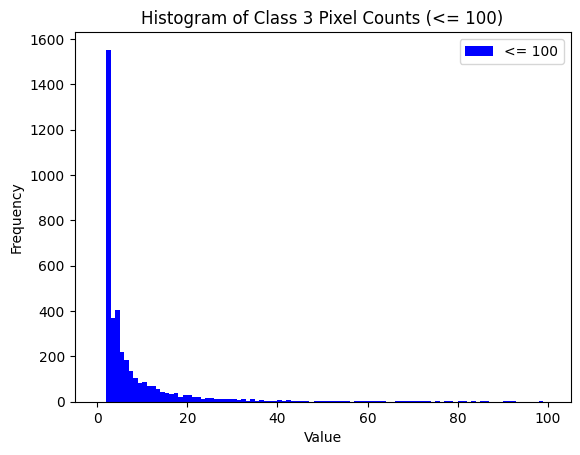

In [13]:
below_100 = [item[0] for item in sorted_contains_3 if item[0] <= 100]
above_100 = [item[0] for item in sorted_contains_3 if item[0] > 100]

# Defining bins for each range
bins_below_100 = list(range(0, 101, 1))  # Bin size 5 up to 100
bins_above_100 = list(range(100, max(above_100) + 101, 100))  # Bin size 100 for values > 100

# Creating subplots
fig, ax = plt.subplots()

# Creating histogram for values <= 100
ax.hist(below_100, bins=bins_below_100, color='blue', label='<= 100')

# Creating histogram for values > 100
# ax.hist(above_100, bins=bins_above_100, color='orange', label='> 100')

# Adding labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Class 3 Pixel Counts (<= 100)')
ax.legend()

# Setting the maximum limit for the y-axis
# max_frequency = max(ax.hist(below_100, bins=bins_below_100)[0].max(), ax.hist(above_100, bins=bins_above_100)[0].max())
# ax.set_ylim(0, max_frequency * 1.1)  # Setting a margin of 10% above the maximum frequency

# Showing the plot
plt.show()

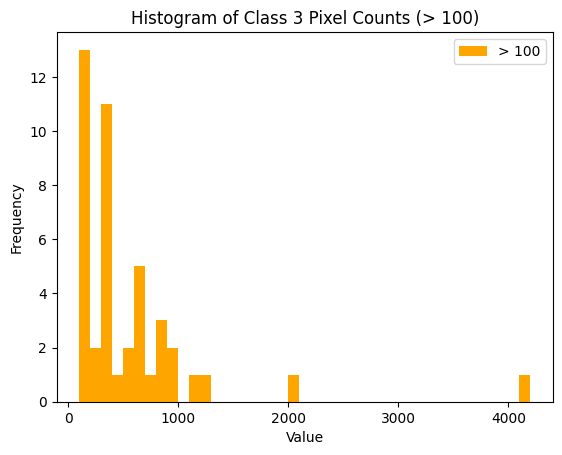

In [11]:
below_100 = [item[0] for item in sorted_contains_3 if item[0] <= 100]
above_100 = [item[0] for item in sorted_contains_3 if item[0] > 100]

# Defining bins for each range
bins_below_100 = list(range(0, 101, 5))  # Bin size 5 up to 100
bins_above_100 = list(range(100, max(above_100) + 101, 100))  # Bin size 100 for values > 100

# Creating subplots
fig, ax = plt.subplots()

# Creating histogram for values <= 100
# ax.hist(below_100, bins=bins_below_100, color='blue', label='<= 100')

# Creating histogram for values > 100
ax.hist(above_100, bins=bins_above_100, color='orange', label='> 100')

# Adding labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Class 3 Pixel Counts (> 100)')
ax.legend()

# Setting the maximum limit for the y-axis
# max_frequency = max(ax.hist(below_100, bins=bins_below_100)[0].max(), ax.hist(above_100, bins=bins_above_100)[0].max())
# ax.set_ylim(0, max_frequency * 1.1)  # Setting a margin of 10% above the maximum frequency

# Showing the plot
plt.show()

In [22]:
import numpy as np
np_contains_3 = np.array([item[0] for item in sorted_contains_3])
unique, counts = np.unique(np_contains_3, return_counts=True)
pixel_count_to_num_vols = dict(zip(unique,counts))

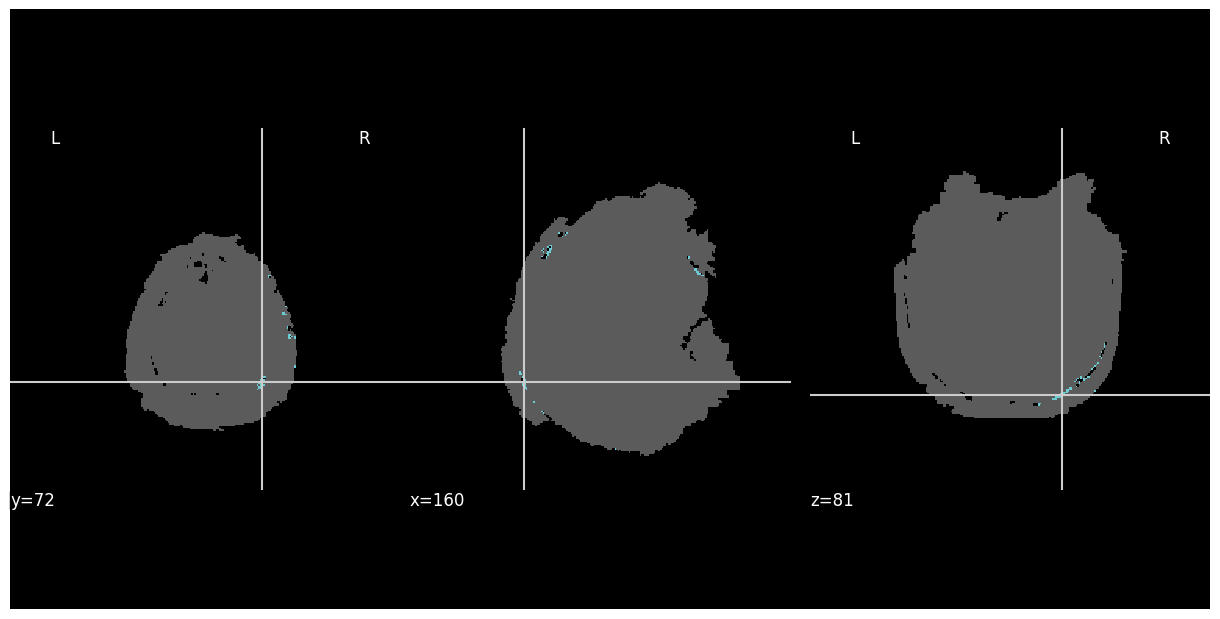

In [47]:
import matplotlib.pyplot as plt
from nilearn import plotting
from nobrainer.volume import standardize

count_3s, feature_path, label_path = sorted_contains_3[0]
feature_vol, label_vol, _ = load_brains(feature_path, label_path)

feature_vol[label_vol != 3] = 0.5
feature_vol[label_vol == 0] = 0
feature_vol[label_vol == 3] = 1

nifty, path = save_volume(feature_vol, None, None, '/om2/user/sabeen/tissue_labeling/misc/filtered_vol_3')

fig = plt.figure(figsize=(12, 6))
plotting.plot_roi(
    nifty,
    bg_img='/om2/user/sabeen/tissue_labeling/misc/filtered_vol_3.nii',
    # cut_coords=(0, 10, -21),
    alpha=0.4,
    vmin=0,
    vmax=5,
    figure=fig,
)

In [65]:
sorted_contains_3[0]
sorted_contains_3[0][0] / int(np.sum(label_vol != 0)) * 100

0.17559329668765258